In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
# {"grid.color": ".6", "grid.linestyle": ":"}
sns.set(font_scale = 1.0)
sns.set_style(style = "white")

In [2]:
df = pd.read_csv('/data02/MyArchive/aisteer_3Dencoders/voids_paper_data/output_recseg_M_a07.csv')

In [3]:
df['${1/r}$'] = 1.0/df['r_fac']
df['t_tot'] = df['t_rec'] + df['t_seg']
df['speedup-rec'] = df['t_rec'].iloc[-1]/df['t_rec']
df['speedup-tot'] = df['t_tot'].iloc[-1]/df['t_tot']
df['speedup-seg'] = df['t_seg'].iloc[-1]/df['t_seg']

In [4]:
df

,r_fac,ntheta,nz,n,t_rec,t_seg,${1/r}$,t_tot,speedup-rec,speedup-tot,speedup-seg
0,0.010000,1500.0,1024.0,2048.0,5702.018066,2006.421509,100.000000,7708.439575,11.768883,28.445996,75.840425
1,0.016681,1500.0,1024.0,2048.0,5862.889648,3002.136475,59.948425,8865.026123,11.445957,24.734754,50.686523
2,0.027826,1500.0,1024.0,2048.0,6736.839844,5015.012207,35.938137,11751.852051,9.961107,18.658697,30.342470
3,0.046416,1500.0,1024.0,2048.0,7829.192871,8043.326660,21.544347,15872.519531,8.571303,13.814709,18.918523
4,0.077426,1500.0,1024.0,2048.0,9797.663086,13504.001953,12.915497,23301.665039,6.849223,9.410239,11.268353
5,0.129155,1500.0,1024.0,2048.0,13163.841797,22724.054688,7.742637,35887.896484,5.097781,6.109978,6.696334
6,0.215443,1500.0,1024.0,2048.0,19022.978516,37683.347656,4.641589,56706.326172,3.527649,3.866839,4.038066
7,0.359381,1500.0,1024.0,2048.0,28467.716797,62916.042969,2.782559,91383.759766,2.357280,2.399488,2.418586
8,0.599484,1500.0,1024.0,2048.0,43834.386719,91346.125000,1.668101,135180.511719,1.530907,1.622085,1.665838
9,1.000000,1500.0,1024.0,2048.0,67106.382812,152167.859375,1.000000,219274.242188,1.000000,1.000000,1.000000


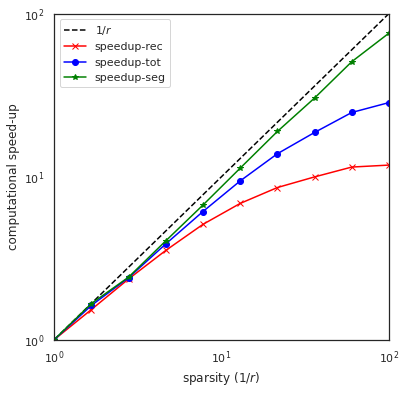

In [5]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['${1/r}$', 'speedup-rec', 'speedup-tot', 'speedup-seg']
colors = ['black', 'red', 'blue', 'green']
markers = ['--', 'x-', 'o-', '*-']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computational speed-up")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
ax.set_ylim([1,100])
ax.legend()

In [6]:
df['$N(v)$'] = df['nz']*df['n']*df['n']*df['r_fac']

In [7]:
df

,r_fac,ntheta,nz,n,t_rec,t_seg,${1/r}$,t_tot,speedup-rec,speedup-tot,speedup-seg,$N(v)$
0,0.010000,1500.0,1024.0,2048.0,5702.018066,2006.421509,100.000000,7708.439575,11.768883,28.445996,75.840425,4.294967e+07
1,0.016681,1500.0,1024.0,2048.0,5862.889648,3002.136475,59.948425,8865.026123,11.445957,24.734754,50.686523,7.164437e+07
2,0.027826,1500.0,1024.0,2048.0,6736.839844,5015.012207,35.938137,11751.852051,9.961107,18.658697,30.342470,1.195100e+08
3,0.046416,1500.0,1024.0,2048.0,7829.192871,8043.326660,21.544347,15872.519531,8.571303,13.814709,18.918523,1.993547e+08
4,0.077426,1500.0,1024.0,2048.0,9797.663086,13504.001953,12.915497,23301.665039,6.849223,9.410239,11.268353,3.325437e+08
5,0.129155,1500.0,1024.0,2048.0,13163.841797,22724.054688,7.742637,35887.896484,5.097781,6.109978,6.696334,5.547164e+08
6,0.215443,1500.0,1024.0,2048.0,19022.978516,37683.347656,4.641589,56706.326172,3.527649,3.866839,4.038066,9.253227e+08
7,0.359381,1500.0,1024.0,2048.0,28467.716797,62916.042969,2.782559,91383.759766,2.357280,2.399488,2.418586,1.543531e+09
8,0.599484,1500.0,1024.0,2048.0,43834.386719,91346.125000,1.668101,135180.511719,1.530907,1.622085,1.665838,2.574765e+09
9,1.000000,1500.0,1024.0,2048.0,67106.382812,152167.859375,1.000000,219274.242188,1.000000,1.000000,1.000000,4.294967e+09


In [8]:
df['$t^v_{seg}$'] = df['t_seg']/df['$N(v)$']*1.0e6
df['$t^v_{rec}$'] = df['t_rec']/df['$N(v)$']*1.0e6
df['$t^v_{tot}$'] = df['t_tot']/df['$N(v)$']*1.0e6

In [9]:
df

,r_fac,ntheta,nz,n,t_rec,t_seg,${1/r}$,t_tot,speedup-rec,speedup-tot,speedup-seg,$N(v)$,$t^v_{seg}$,$t^v_{rec}$,$t^v_{tot}$
0,0.010000,1500.0,1024.0,2048.0,5702.018066,2006.421509,100.000000,7708.439575,11.768883,28.445996,75.840425,4.294967e+07,46.715641,132.760454,179.476095
1,0.016681,1500.0,1024.0,2048.0,5862.889648,3002.136475,59.948425,8865.026123,11.445957,24.734754,50.686523,7.164437e+07,41.903312,81.833219,123.736531
2,0.027826,1500.0,1024.0,2048.0,6736.839844,5015.012207,35.938137,11751.852051,9.961107,18.658697,30.342470,1.195100e+08,41.963112,56.370504,98.333616
3,0.046416,1500.0,1024.0,2048.0,7829.192871,8043.326660,21.544347,15872.519531,8.571303,13.814709,18.918523,1.993547e+08,40.346808,39.272673,79.619481
4,0.077426,1500.0,1024.0,2048.0,9797.663086,13504.001953,12.915497,23301.665039,6.849223,9.410239,11.268353,3.325437e+08,40.608200,29.462782,70.070982
5,0.129155,1500.0,1024.0,2048.0,13163.841797,22724.054688,7.742637,35887.896484,5.097781,6.109978,6.696334,5.547164e+08,40.965179,23.730762,64.695941
6,0.215443,1500.0,1024.0,2048.0,19022.978516,37683.347656,4.641589,56706.326172,3.527649,3.866839,4.038066,9.253227e+08,40.724549,20.558211,61.282760
7,0.359381,1500.0,1024.0,2048.0,28467.716797,62916.042969,2.782559,91383.759766,2.357280,2.399488,2.418586,1.543531e+09,40.761108,18.443240,59.204348
8,0.599484,1500.0,1024.0,2048.0,43834.386719,91346.125000,1.668101,135180.511719,1.530907,1.622085,1.665838,2.574765e+09,35.477458,17.024615,52.502072
9,1.000000,1500.0,1024.0,2048.0,67106.382812,152167.859375,1.000000,219274.242188,1.000000,1.000000,1.000000,4.294967e+09,35.429341,15.624422,51.053763


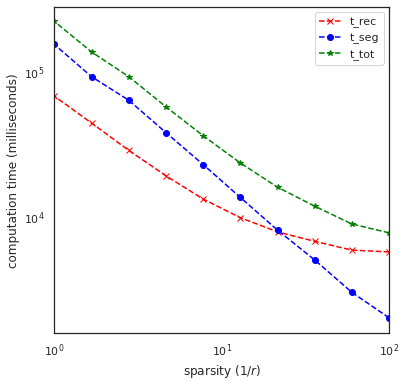

In [10]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
labels = ['t_rec', 't_seg', 't_tot']
colors = ['red', 'blue', 'green']
markers = ['x--', 'o--', '*--']

for iplot, label in enumerate(labels):
    ax.plot(df['${1/r}$'], df[label], markers[iplot], color = colors[iplot], label = label)
ax.set_xlabel("sparsity (${1/r}$)")
ax.set_ylabel("computation time (milliseconds)")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1,100])
# ax.set_ylim([1,100])
ax.legend()

In [11]:
df

,r_fac,ntheta,nz,n,t_rec,t_seg,${1/r}$,t_tot,speedup-rec,speedup-tot,speedup-seg,$N(v)$,$t^v_{seg}$,$t^v_{rec}$,$t^v_{tot}$
0,0.010000,1500.0,1024.0,2048.0,5702.018066,2006.421509,100.000000,7708.439575,11.768883,28.445996,75.840425,4.294967e+07,46.715641,132.760454,179.476095
1,0.016681,1500.0,1024.0,2048.0,5862.889648,3002.136475,59.948425,8865.026123,11.445957,24.734754,50.686523,7.164437e+07,41.903312,81.833219,123.736531
2,0.027826,1500.0,1024.0,2048.0,6736.839844,5015.012207,35.938137,11751.852051,9.961107,18.658697,30.342470,1.195100e+08,41.963112,56.370504,98.333616
3,0.046416,1500.0,1024.0,2048.0,7829.192871,8043.326660,21.544347,15872.519531,8.571303,13.814709,18.918523,1.993547e+08,40.346808,39.272673,79.619481
4,0.077426,1500.0,1024.0,2048.0,9797.663086,13504.001953,12.915497,23301.665039,6.849223,9.410239,11.268353,3.325437e+08,40.608200,29.462782,70.070982
5,0.129155,1500.0,1024.0,2048.0,13163.841797,22724.054688,7.742637,35887.896484,5.097781,6.109978,6.696334,5.547164e+08,40.965179,23.730762,64.695941
6,0.215443,1500.0,1024.0,2048.0,19022.978516,37683.347656,4.641589,56706.326172,3.527649,3.866839,4.038066,9.253227e+08,40.724549,20.558211,61.282760
7,0.359381,1500.0,1024.0,2048.0,28467.716797,62916.042969,2.782559,91383.759766,2.357280,2.399488,2.418586,1.543531e+09,40.761108,18.443240,59.204348
8,0.599484,1500.0,1024.0,2048.0,43834.386719,91346.125000,1.668101,135180.511719,1.530907,1.622085,1.665838,2.574765e+09,35.477458,17.024615,52.502072
9,1.000000,1500.0,1024.0,2048.0,67106.382812,152167.859375,1.000000,219274.242188,1.000000,1.000000,1.000000,4.294967e+09,35.429341,15.624422,51.053763
